In [1]:
import pandas as pd
df=pd.read_csv('modeling.csv')
del df['Unnamed: 0']

df.head(2)


,연월,연령대,성별,가구생애주기,카드이용_시도1,업종명1,계절1,년,월,이용고객수,이용건수,이용금액
0,201901,20,1,1,1,1,4,2019,1,4,4,311200
1,201901,30,1,2,1,1,4,2019,1,7,8,1374500


In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [3]:
X = df[['연월', '연령대', '성별', '가구생애주기', '카드이용_시도1', '업종명1', '계절1', '년', '월',
       '이용고객수', '이용건수']]
y = df['이용금액']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [4]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7)

print(len(X_train), len(X_test))

17288454 7409338


In [6]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

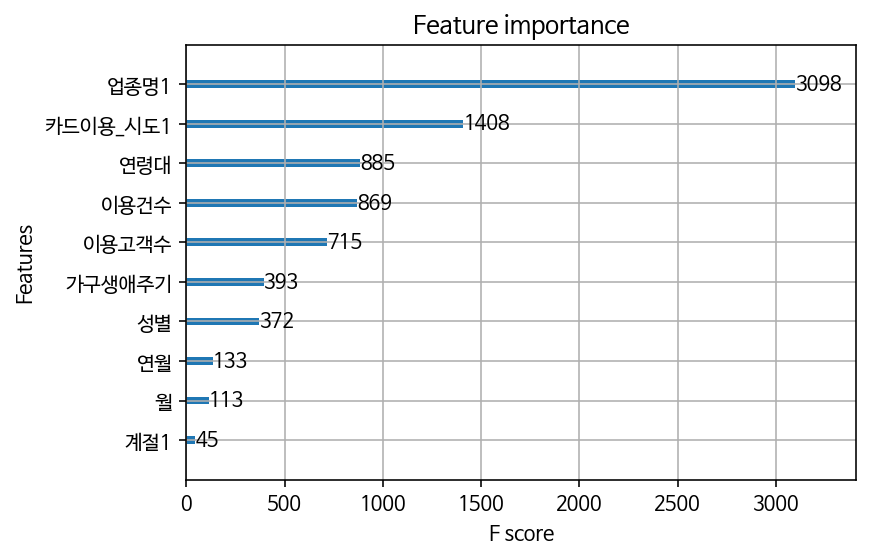

In [11]:
xgb.plot_importance(xgb_model)


In [9]:
predictions = xgb_model.predict(X_test)
predictions

array([ 637973.6  ,  -24715.414, 1548724.2  , ...,   59269.53 ,
        412140.38 , -124850.36 ], dtype=float32)

In [12]:
from sklearn.metrics import explained_variance_score
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.6003894052564342
0.27028281810327115
